<a href="https://colab.research.google.com/github/oviedof1/Machine-Learning/blob/master/Neural_Network_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: Detects if a person has diabetes or not

#Load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
#load data
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
#store data
df = pd.read_csv('diabetes.csv')
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [5]:
#get shape of data
df.shape

(768, 9)

In [8]:
#check for duplicates
df.drop_duplicates(inplace=True)
df.shape

(768, 9)

In [10]:
#show number of missing data for each colum
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
#conver the data to numpy array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [0]:
#get all rows from first 8 columns of dataset
x = dataset[:,0:8]
y = dataset[:,8]


In [17]:
#process data
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler()
x_scale = min_max_scalar.fit_transform(x)
x_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [0]:
#split the data into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.2, random_state = 4)

In [0]:
#build the model

model = Sequential([
                    Dense(12, activation='relu',input_shape=(8,)), 
                    Dense(15, activation='relu'), 
                    Dense(1, activation='sigmoid')
                    ])

In [0]:
#compile the model
model.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])

In [22]:
#train the model
hist = model.fit(x_train, y_train, batch_size=57, epochs=1000, validation_split=0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 0s 564us/step - loss: 0.6867 - accuracy: 0.6191 - val_loss: 0.6844 - val_accuracy: 0.6341
Epoch 2/1000
491/491 [==============================] - 0s 32us/step - loss: 0.6819 - accuracy: 0.6334 - val_loss: 0.6797 - val_accuracy: 0.6585
Epoch 3/1000
491/491 [==============================] - 0s 30us/step - loss: 0.6777 - accuracy: 0.6395 - val_loss: 0.6758 - val_accuracy: 0.6585
Epoch 4/1000
491/491 [==============================] - 0s 31us/step - loss: 0.6743 - accuracy: 0.6375 - val_loss: 0.6726 - val_accuracy: 0.6585
Epoch 5/1000
491/491 [==============================] - 0s 34us/step - loss: 0.6714 - accuracy: 0.6395 - val_loss: 0.6699 - val_accuracy: 0.6585
Epoch 6/1000
491/491 [==============================] - 0s 32us/step - loss: 0.6689 - accuracy: 0.6477 - val_loss: 0.6675 - val_accuracy: 0.6585
Epoch 7/1000
491/491 [==============================] - 0s 31us/step - loss: 0.6669

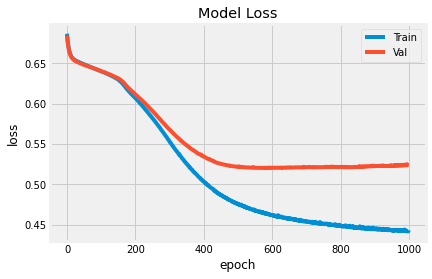

In [25]:
#visualize the training loss and validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

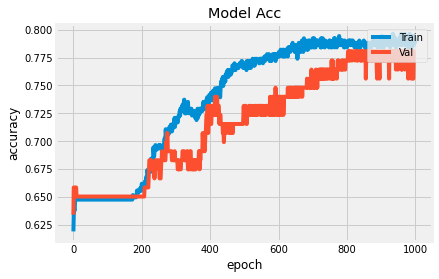

In [26]:
#visualize the training accuracy and validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [30]:
#make a prediction and print acctual values
prediction = model.predict(x_test)
prediction = [1 if y>=0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [33]:
#evaluate the model on training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(x_train)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy \n', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       398
         1.0       0.75      0.61      0.67       216

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614

Confusion Matrix: 
 [[354  44]
 [ 84 132]]

Accuracy 
 0.7915309446254072


In [34]:
#evaluate the model on test dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       102
         1.0       0.64      0.65      0.65        52

    accuracy                           0.76       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix: 
 [[83 19]
 [18 34]]

Accuracy 
 0.7597402597402597
